In [18]:
#new
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

df = pd.read_csv('train.csv')

#Drop non-numeric columns except the target column
non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
non_numeric_cols.remove('track_genre')  # Keep the target column
df.drop(columns=non_numeric_cols, inplace=True)


df.dropna(inplace=True)
df['genre_label'] = df['track_genre']

#Encode the target column
label_encoder = LabelEncoder()
df['track_genre'] = label_encoder.fit_transform(df['track_genre'])

X = df.drop(columns=['track_genre'])
y = df['track_genre']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))  #only scale numeric features


Saved LabelEncoder to 'saved_models/label_encoder.joblib'


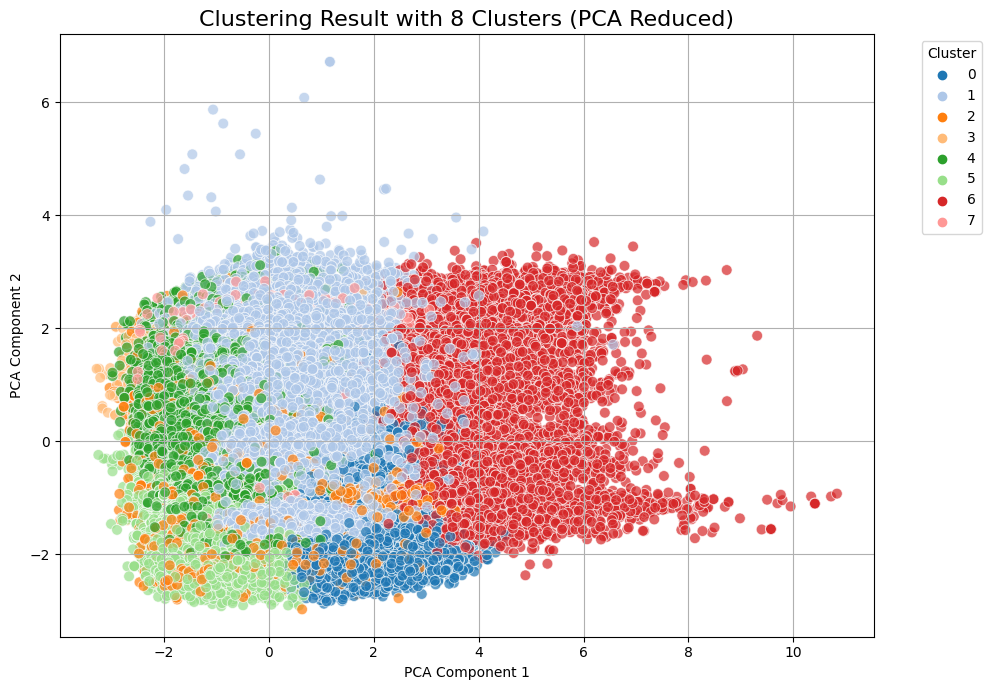

Clustering result image saved to: kmeans_clustering_pca_8_clusters.png
CSV saved: music_dataset_with_clusters.csv (8 clusters)
Saved StandardScaler to 'saved_models/scaler.joblib'
Cluster 0 => Train set: cluster_split_data\cluster_0_train.csv | Test set: cluster_split_data\cluster_0_test.csv
Cluster 1 => Train set: cluster_split_data\cluster_1_train.csv | Test set: cluster_split_data\cluster_1_test.csv
Cluster 2 => Train set: cluster_split_data\cluster_2_train.csv | Test set: cluster_split_data\cluster_2_test.csv
Cluster 3 => Train set: cluster_split_data\cluster_3_train.csv | Test set: cluster_split_data\cluster_3_test.csv
Cluster 4 => Train set: cluster_split_data\cluster_4_train.csv | Test set: cluster_split_data\cluster_4_test.csv
Cluster 5 => Train set: cluster_split_data\cluster_5_train.csv | Test set: cluster_split_data\cluster_5_test.csv
Cluster 6 => Train set: cluster_split_data\cluster_6_train.csv | Test set: cluster_split_data\cluster_6_test.csv
Cluster 7 => Train set: clust

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

label_encoder = LabelEncoder()
df['track_genre_encoded'] = label_encoder.fit_transform(df['track_genre'])

X = df.select_dtypes(include=['number']).drop(columns=['track_genre_encoded'], errors='ignore').fillna(0)

#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Clustering (set number of clusters)
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

#Dimensionality reduction with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='tab20', s=60, alpha=0.7)
plt.title(f'Clustering Result with {n_clusters} Clusters (PCA Reduced)', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

image_path = f'kmeans_clustering_pca_{n_clusters}_clusters.png'
plt.savefig(image_path, dpi=300)
plt.show()
print(f"Clustering result image saved to: {image_path}")

df.drop(['pca1', 'pca2'], axis=1, inplace=True)

df.to_csv('music_dataset_with_clusters.csv', index=False)
print(f"CSV saved: music_dataset_with_clusters.csv ({n_clusters} clusters)")

#Save scaler for future use
joblib.dump(scaler, 'saved_models/scaler.joblib')
print("Saved StandardScaler to 'saved_models/scaler.joblib'")

output_dir = 'cluster_split_data'
os.makedirs(output_dir, exist_ok=True)

#Create train/test splits per cluster
test_frac = 0.2

for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    
    test_cluster = cluster_data.sample(frac=test_frac, random_state=42)
    train_cluster = cluster_data.drop(index=test_cluster.index)
    
    train_path = os.path.join(output_dir, f'cluster_{cluster_id}_train.csv')
    test_path = os.path.join(output_dir, f'cluster_{cluster_id}_test.csv')
    
    train_cluster.to_csv(train_path, index=False)
    test_cluster.to_csv(test_path, index=False)
    
    print(f"Cluster {cluster_id} => Train set: {train_path} | Test set: {test_path}")

print("\nAll cluster train/test splits have been saved.")
